# Pyber Ride Sharing



1. Pyber is most popular among drivers and riders in Urban cities, followed by Suburban.
2. Pyber is comparitively cheaper in Urban regions.
3. Number of drivers is correlated to number of rides in the city.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [2]:
city_filename = os.path.join('raw_data','city_data.csv')
ride_filename = os.path.join('raw_data','ride_data.csv')

In [34]:
city_df = pd.read_csv(city_filename)
ride_df = pd.read_csv(ride_filename)
rideshares_df = ride_df.merge(city_df,on="city")

rideshares_df['date'] = pd.to_datetime(rideshares_df['date'])


# City Summary 

In [4]:
city_group = rideshares_df.groupby(["city","driver_count","type"])

city_summary = pd.DataFrame()
city_summary["Total Rides (per City)"] = city_group["ride_id"].count()
city_summary["Average Fare ($)"] = city_group["fare"].mean()
city_summary["Total Fare ($)"] = city_group["fare"].sum()
city_summary = city_summary.reset_index()


city_summary.head()

,city,driver_count,type,Total Rides (per City),Average Fare ($),Total Fare ($)
0,Alvarezhaven,21,Urban,31,23.928710,741.79
1,Alyssaberg,67,Urban,26,20.609615,535.85
2,Anitamouth,16,Suburban,9,37.315556,335.84
3,Antoniomouth,21,Urban,22,23.625000,519.75
4,Aprilchester,49,Urban,19,21.981579,417.65


# Bubble Plot Of Ride Sharing Data

In [23]:
colors = {"Urban":"lightsalmon","Suburban":"deepskyblue","Rural":"yellow"}

scatter_plot_df = city_summary[["Total Rides (per City)","Average Fare ($)","type"]]

urban_set = city_summary[city_summary.type == "Urban"]
suburb_set = city_summary[city_summary.type == "Suburban"]
rural_set = city_summary[city_summary.type == "Rural"]
handles = []
ax = urban_set.plot(kind="scatter",
                   x="Total Rides (per City)",y="Average Fare ($)",
                   edgecolor='k',
                   s=city_summary.driver_count*5,
                   color="lightsalmon",
                   label="Urban")
suburb_set.plot(kind="scatter",
               x="Total Rides (per City)",y="Average Fare ($)",
               edgecolor='k',
               s=city_summary.driver_count*5,
               color="deepskyblue",
               label="Suburban",
               ax=ax)
rural_set.plot(kind="scatter",x="Total Rides (per City)",y="Average Fare ($)",
               edgecolor='k',
               s=city_summary.driver_count*5,
               color="yellow",
               label="Rural",
               ax=ax)

plt.legend(title="City types")

plt.xlabel("Total Rides (per City)")

plt.ylabel("Average Fare ($)")

plt.title("PyBer RideSharing Data(2016)")

plt.text(37,35,"Note:\nCircle size correlates with number of drivers per city")

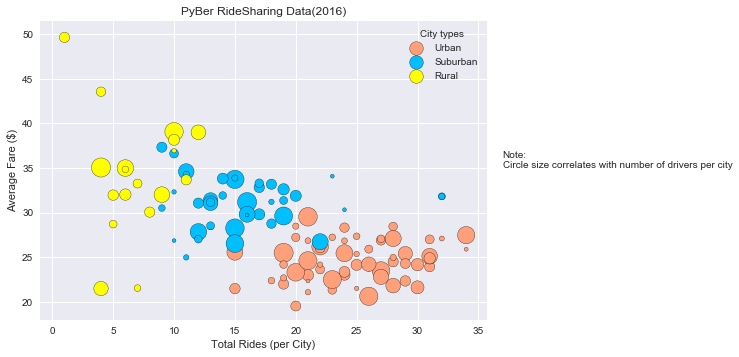

In [24]:
plt.show()

In [7]:
city_type_group = city_summary.groupby("type")

city_type_summary = pd.DataFrame()

city_type_summary["Total Rides"] = city_type_group["Total Rides (per City)"].sum()
city_type_summary["Total Drivers"] = city_type_group["driver_count"].sum()
city_type_summary["Total Fare ($)"] = city_type_group["Total Fare ($)"].sum()
city_type_summary.reset_index(inplace=True)
city_type_summary.head()

,type,Total Rides,Total Drivers,Total Fare ($)
0,Rural,125,104,4255.09
1,Suburban,657,638,20335.69
2,Urban,1625,2607,40078.34


# Rides by City Type

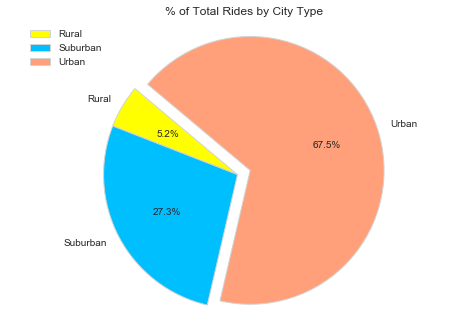

In [8]:
explode_dict = {"Urban":0.1,"Suburban":0,"Rural":0}
city_type_summary["explode"] = [explode_dict[x] for x in city_type_summary["type"]]
city_type_summary["colors"] = [colors[x] for x in city_type_summary["type"]]

city_type_summary.plot(kind="pie",y="Total Rides", autopct='%1.1f%%',
 startangle=140, shadow=False,explode=city_type_summary.explode,
                       colors=city_type_summary.colors,labels=city_type_summary.type,
                      wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'})

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Rides by City Type')

plt.show()

# Drivers by City Type

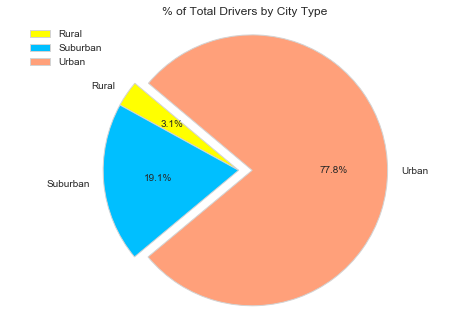

In [9]:
city_type_summary.plot(kind="pie",y="Total Drivers", autopct='%1.1f%%',
 startangle=140, shadow=False,explode=city_type_summary.explode,
                       colors=city_type_summary.colors,labels=city_type_summary.type,
                      wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'})

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Drivers by City Type')

plt.show()

# Fare by City Type

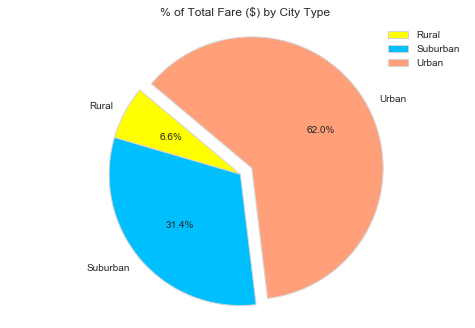

In [35]:
city_type_summary.plot(kind="pie",y="Total Fare ($)", autopct='%1.1f%%',
 startangle=140, shadow=False,explode=city_type_summary.explode,
                       colors=city_type_summary.colors,labels=city_type_summary.type,
                      wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'})

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Fare ($) by City Type')

plt.show()